In [5]:
import pyLDAvis.gensim
import gensim
import numpy as np
import data_processing as data_proc
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

# **Get the clean documents, dictionary and corpus**

In [6]:
def clean_data(use_nouns=True, use_verbs=False):
    lemmatizer = WordNetLemmatizer()
    filename = "../res/tweets_pos_train.txt"
    data = data_proc.load_file(filename).split("\n")
    documents = []
    clean_tweet = []
    for line in data:
        line = line.split("\t")
        if len(line) < 2:
            documents.append(clean_tweet)
            clean_tweet = []
            continue
        if use_nouns and line[1] is 'N':
            clean_tweet.append(lemmatizer.lemmatize(line[0].lower()))
        if use_verbs and line[1] is 'V':
            clean_tweet.append(lemmatizer.lemmatize(line[0].lower(), 'v'))
    dictionary = gensim.corpora.Dictionary(documents)
    corpus = [dictionary.doc2bow(doc) for doc in documents]
    return documents, dictionary, corpus

In [7]:
documents, dictionary, corpus = clean_data(use_nouns=True, use_verbs=False)

# **Topic modeling with LSI**

- useful because it can rank topics by itself
- outputs topics in a ranked order, but it sill requires a num_topics parameter to determine the number of latent dimensions after the SVD.

In [29]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [30]:
lsitopics = lsimodel.show_topics(formatted=False)
lsitopics_list = [[word for word, prob in topic] for topicid, topic in lsitopics]

In [31]:
print("LSI Topic list:\n")
for topic in lsitopics_list:
    print(topic, '\n')

LSI Topic list:

['day', 'people', 'time', 'today', 'school', 'work', 'life', 'birthday', 'tomorrow', 'thing'] 

['people', 'day', 'time', 'life', 'thing', 'shit', 'friend', 'someone', 'school', 'year'] 

['time', 'people', 'day', 'year', 'school', 'life', 'night', 'friend', 'thing', 'someone'] 

['life', 'school', 'thing', 'time', 'people', 'day', 'friend', 'night', 'today', 'love'] 

['school', 'life', 'class', 'home', 'today', 'day', 'tomorrow', 'work', 'hour', 'night'] 

['thing', 'life', 'school', 'friend', 'today', 'night', 'girl', 'shit', 'time', 'thanks'] 

['friend', 'thing', 'today', 'night', 'school', 'class', 'girl', 'love', 'shit', 'thanks'] 

['friend', 'night', 'today', 'class', 'school', 'work', 'thing', 'tomorrow', 'love', 'morning'] 

['night', 'today', 'class', 'love', 'game', 'tomorrow', 'girl', 'morning', 'shit', 'work'] 

['shit', 'year', 'class', 'night', 'friend', 'girl', 'bitch', 'guy', 'life', 'time'] 



# **Topic modeling with HDP**

- Hierarchical Dirichlet Process (HDP) is fully unsupervised
- It can determine the ideal number of topics it needs through posterior inference.

In [32]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

In [33]:
hdptopics = hdpmodel.show_topics(formatted=False)
hdptopics_list = [[word for word, prob in topic] for topicid, topic in hdptopics]

In [34]:
print("HDP Topic list:\n")
for topic in hdptopics_list:
    print(topic, '\n')

HDP Topic list:

['day', 'time', 'people', 'life', 'home', 'school', 'today', 'friend', 'rn', 'mom', 'thing', 'nerd', 'something', 'someone', 'girl', 'tomorrow', 'thanks', 'adri', 'uranium', 'love'] 

['day', 'people', 'time', 'today', 'night', 'life', 'school', 'someone', 'shit', 'thing', 'tint', 'class', 'preference', 'tomorrow', 'ligament', 'year', 'conversation', 'lannister', 'father', 'power'] 

['day', 'people', 'time', 'today', 'year', 'life', 'tomorrow', 'school', 'tshirt', 'night', 'love', 'homework', 'screenshots', 'thing', 'hour', 'arm', 'friend', 'girl', 'bed', 'scope'] 

['day', 'people', 'time', 'love', 'von', 'life', 'book', '#photo', 'today', 'shitt', 'thing', 'home', 'school', 'mom', 'girl', 'shit', 'dance', 'zero', 'week', 'year'] 

['day', 'time', 'people', 'school', 'class', 'shit', 'girl', 'guy', 'passenger', 'night', 'someone', 'life', 'today', 'point', 'thundercunt', 'nothing', 'swim', 'love', 'game', 'thing'] 

['people', 'day', 'shit', 'time', 'thing', 'someone

# **Topic modeling using LDA**

- generative model, assuming that each document is a mixture of topics
- additionally, each topic is a mixture of words

In [10]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [11]:
ldatopics = ldamodel.show_topics(formatted=False)
ldatopics_list = [[word for word, prob in topic] for topicid, topic in ldatopics]

In [12]:
print("LDA Topic list:\n")
for topic in ldatopics_list:
    print(topic, '\n')

LDA Topic list:

['class', 'guy', 'song', 'bed', 'car', 'family', 'relationship', 'teacher', 'house', 'mind'] 

['school', 'hour', 'tomorrow', 'boy', 'as', 'sleep', 'test', 'video', 'head', 'life'] 

['face', 'side', 'mood', 'season', 'text', 'college', 'minute', 'credit', 'hell', 'history'] 

['thing', 'way', 'morning', 'woman', 'bitch', 'man', 'food', 'anything', 'child', 'anyone'] 

['night', 'birthday', 'dog', 'shower', 'place', 'date', 'example', 'second', 'state', 'control'] 

['life', 'nothing', 'week', 'person', 'hair', 'tonight', 'job', 'music', 'rain', 'one'] 

['shit', 'girl', 'game', 'something', 'kid', 'idea', 'reason', 'photo', 'stuff', 'fact'] 

['people', 'time', 'today', 'thanks', 'home', 'mom', 'work', 'world', 'lot', 'word'] 

['year', 'someone', 'everyone', 'room', 'weekend', 'time', 'money', 'name', 'fuck', 'today'] 

['day', 'friend', 'love', 'phone', 'homework', 'everything', 'fun', 'parent', 'school', 'exam'] 



In [13]:
def color_words(model, doc):
    doc = model.id2word.doc2bow(doc)
    doc_topics, word_topics, phi_values = model.get_document_topics(doc, per_word_topics=True)
    topic_colors = {0: 'blue', 1: 'red', 2: 'green', 3: 'orange', 4: 'purple', 5: 'pink',
                    6: 'brown', 7: 'grey', 8: 'navy', 9: 'salmon'}
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    word_pos = 1 / len(doc) # this si just to make sure that the words are well spaced out
    for word, topics in word_topics:
        ax.text(word_pos, 0.8, model.id2word[word],
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=20, color=topic_colors[topics[0]],
                transform=ax.transAxes)
        word_pos += 0.2
    ax.set_axis_off()
    plt.show()

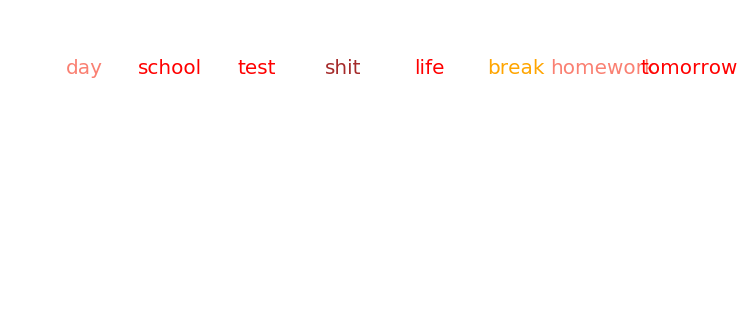

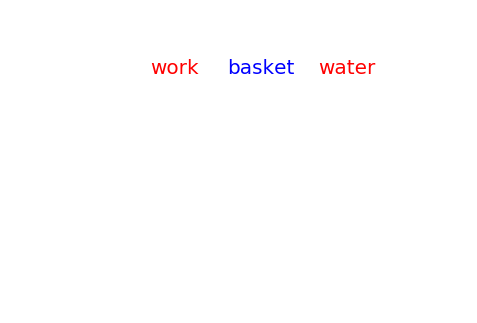

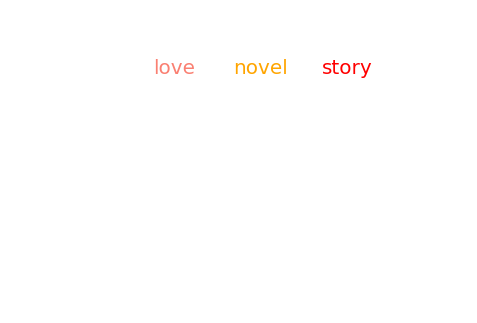

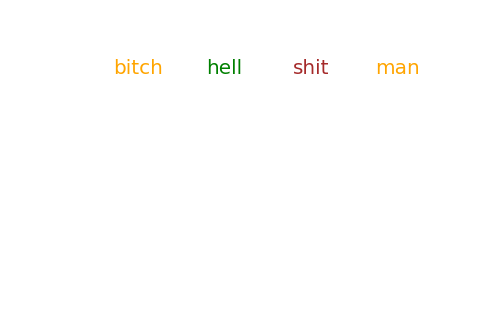

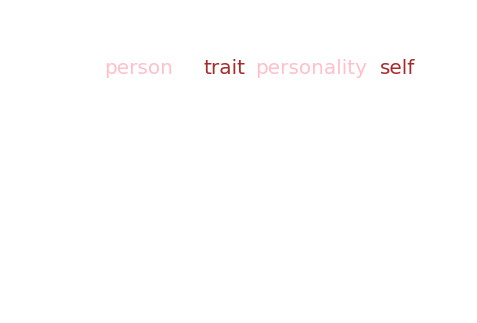

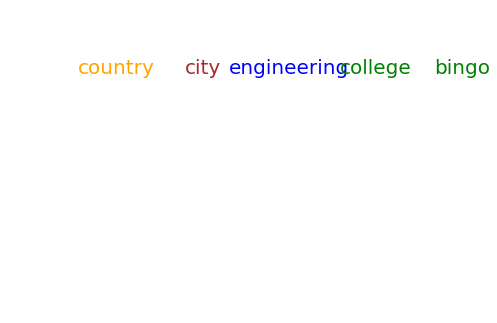

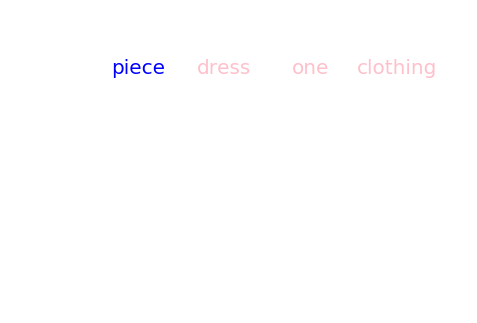

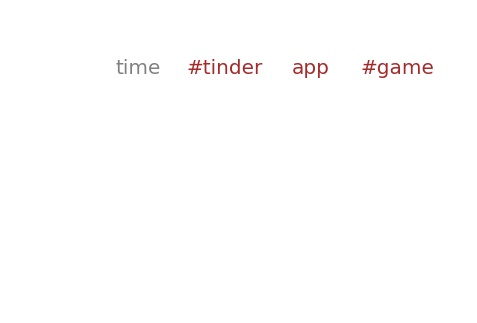

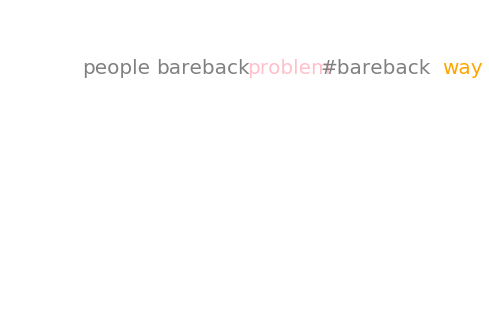

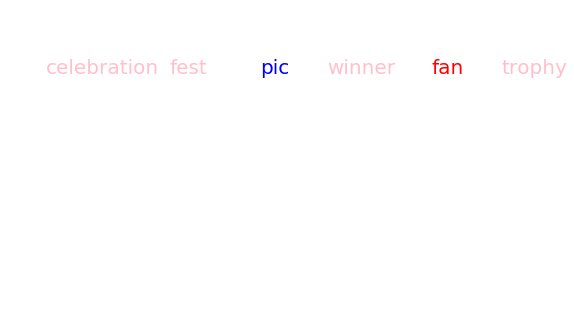

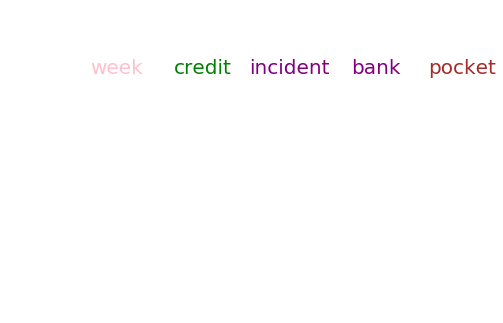

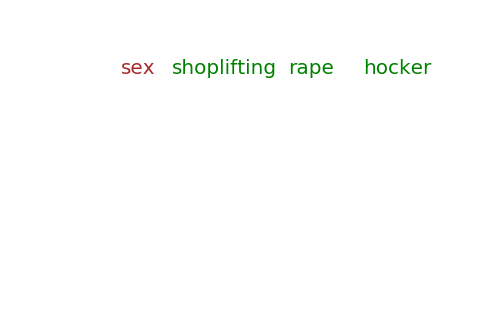

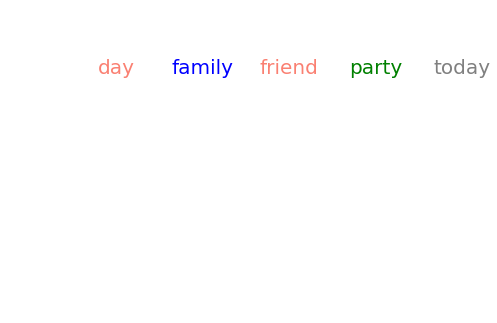

In [14]:
for doc in documents[50:100]:
    if(len(doc) > 3):
        color_words(ldamodel, doc)

In [40]:
pyLDAvis.enable_notebook()

In [41]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
7      11.279349        1       1 -0.188545  0.308551
6      10.715323        1       2  0.248753  0.030268
4      10.089060        1       3  0.212237  0.027567
5      10.041792        1       4 -0.056298 -0.211922
0      10.015320        1       5  0.045535  0.155775
8       9.846569        1       6  0.062300 -0.063887
9       9.682362        1       7  0.024197 -0.004586
1       9.668415        1       8 -0.097838 -0.087885
2       9.381808        1       9 -0.086315 -0.051166
3       9.280002        1      10 -0.164026 -0.102715, topic_info=      Category         Freq          Term        Total  loglift  logprob
term                                                                    
3734   Default  2806.000000           day  2806.000000  30.0000  30.0000
2156   Default  2318.000000        people  2318.000000  29.0000  29.0000
3484   Default  1949.000000          time  1949.000000  28.0000  28.0000
10228  Default  1231.000000         thing  1231.000000  27.0000  27.0000
5867   Default  1203.000000        school  1203.000000  26.0000  26.0000
2685   Default  1175.000000         today  1175.000000  25.0000  25.0000
9767   Default   997.000000        friend   997.000000  24.0000  24.0000
1943   Default   991.000000         class   991.000000  23.0000  23.0000
8502   Default   937.000000          shit   937.000000  22.0000  22.0000
4248   Default   892.000000          year   892.000000  21.0000  21.0000
6700   Default   869.000000       someone   869.000000  20.0000  20.0000
2805   Default   850.000000          love   850.000000  19.0000  19.0000
11413  Default   843.000000        thanks   843.000000  18.0000  18.0000
5196   Default   757.000000       nothing   757.000000  17.0000  17.0000
4636   Default   968.000000         night   968.000000  16.0000  16.0000
9028   Default   730.000000           guy   730.000000  15.0000  15.0000
10056  Default   778.000000          work   778.000000  14.0000  14.0000
4641   Default   733.000000           way   733.000000  13.0000  13.0000
3758   Default   708.000000       morning   708.000000  12.0000  12.0000
6290   Default   728.000000      tomorrow   728.000000  11.0000  11.0000
10908  Default   778.000000          home   778.000000  10.0000  10.0000
4263   Default   634.000000          week   634.000000   9.0000   9.0000
3275   Default   589.000000          game   589.000000   8.0000   8.0000
4070   Default   566.000000        person   566.000000   7.0000   7.0000
5650   Default   560.000000      everyone   560.000000   6.0000   6.0000
3338   Default   494.000000           mom   494.000000   5.0000   5.0000
2498   Default   503.000000     something   503.000000   4.0000   4.0000
4568   Default   486.000000         bitch   486.000000   3.0000   3.0000
7116   Default   494.000000           man   494.000000   2.0000   2.0000
11144  Default   477.000000           kid   477.000000   1.0000   1.0000
...        ...          ...           ...          ...      ...      ...
3920   Topic10   225.514601          part   226.516929   2.3729  -4.0595
5806   Topic10   251.044776           one   252.371009   2.3720  -3.9522
1401   Topic10   249.638209          baby   251.021468   2.3718  -3.9578
3727   Topic10   146.583863        medium   147.414303   2.3717  -4.4903
1671   Topic10   147.031460         album   147.904716   2.3714  -4.4872
1390   Topic10   136.707380     yesterday   137.529549   2.3713  -4.5600
9666   Topic10   127.990807          date   128.866499   2.3705  -4.6259
6585   Topic10   148.564489          door   149.683677   2.3698  -4.4768
9084   Topic10   109.239825        enough   110.066782   2.3698  -4.7843
1224   Topic10   161.341053      internet   162.573181   2.3697  -4.3943
6647   Topic10   128.749221       brother   129.744056   2.3696  -4.6200
857    Topic10   112.407027     president   113.298167   2.3694  -4.7557
5909   Topic10   142.344

# **Finding out the optimal number of topics**

- use **topic coherence** to measure human interpretability of a topic model
- traditionally, **perplexity** has been used to evaluate topic models (doesn't always correlate with human annotations)
- toic coherence evaluates topic models with a much higher guarantee on human interpretability
- can be used to compare different topic models among many other use-cases

In [42]:
def evaluate_graph(dictionary, corpus, texts, limit):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        lm = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.savefig("plot_topic_modelling_coherence.png")
    plt.show()
    
    return lm_list, c_v

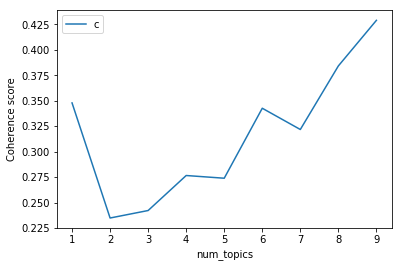

CPU times: user 5min 16s, sys: 1.58 s, total: 5min 17s
Wall time: 5min 24s


In [43]:
%%time
lmlist, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=documents, limit=10)

In [44]:
pyLDAvis.gensim.prepare(lmlist[2], corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      34.972460        1       1 -0.167982  0.236675
0      34.574242        1       2 -0.133284 -0.255574
1      30.453298        1       3  0.301267  0.018898, topic_info=      Category         Freq          Term        Total  loglift  logprob
term                                                                    
2156   Default  2335.000000        people  2335.000000  30.0000  30.0000
3484   Default  1931.000000          time  1931.000000  29.0000  29.0000
4117   Default  1404.000000          life  1404.000000  28.0000  28.0000
2685   Default  1225.000000         today  1225.000000  27.0000  27.0000
5867   Default  1249.000000        school  1249.000000  26.0000  26.0000
4248   Default   932.000000          year   932.000000  25.0000  25.0000
9767   Default  1007.000000        friend  1007.000000  24.0000  24.0000
1943   Default  1001.000000         class  1001.000000  23.0000  23.0000
3734   Default  2921.000000           day  2921.000000  22.0000  22.0000
4636   Default   961.000000         night   961.000000  21.0000  21.0000
9651   Default   918.000000          girl   918.000000  20.0000  20.0000
5196   Default   762.000000       nothing   762.000000  19.0000  19.0000
8502   Default   916.000000          shit   916.000000  18.0000  18.0000
11413  Default   854.000000        thanks   854.000000  17.0000  17.0000
3758   Default   717.000000       morning   717.000000  16.0000  16.0000
6290   Default   757.000000      tomorrow   757.000000  15.0000  15.0000
10056  Default   811.000000          work   811.000000  14.0000  14.0000
1729   Default   653.000000          hour   653.000000  13.0000  13.0000
4263   Default   613.000000          week   613.000000  12.0000  12.0000
9028   Default   716.000000           guy   716.000000  11.0000  11.0000
10228  Default  1225.000000         thing  1225.000000  10.0000  10.0000
3275   Default   581.000000          game   581.000000   9.0000   9.0000
2498   Default   511.000000     something   511.000000   8.0000   8.0000
4568   Default   496.000000         bitch   496.000000   7.0000   7.0000
10539  Default   543.000000         woman   543.000000   6.0000   6.0000
4070   Default   546.000000        person   546.000000   5.0000   5.0000
4382   Default   538.000000         phone   538.000000   4.0000   4.0000
5284   Default   515.000000      birthday   515.000000   3.0000   3.0000
4466   Default   449.000000          song   449.000000   2.0000   2.0000
2805   Default   845.000000          love   845.000000   1.0000   1.0000
...        ...          ...           ...          ...      ...      ...
5049    Topic3   219.064817          book   220.468827   1.1826  -5.2768
3457    Topic3   103.677857           mum   104.362788   1.1824  -6.0249
4791    Topic3    96.593083          self    97.244658   1.1823  -6.0957
1166    Topic3   116.112636        prayer   116.905305   1.1822  -5.9116
2435    Topic3    94.817410       allergy    95.479791   1.1820  -6.1142
8673    Topic3   117.922324      bullshit   118.774033   1.1818  -5.8962
3297    Topic3    87.574433       holiday    88.246082   1.1813  -6.1937
11455   Topic3    90.611450        career    91.340516   1.1810  -6.1596
7328    Topic3    78.001398          drug    78.646395   1.1807  -6.3095
4427    Topic3   110.301960         sense   111.215799   1.1807  -5.9630
7998    Topic3    79.024996         peace    79.687972   1.1806  -6.2964
5196    Topic3   756.070090       nothing   762.896766   1.1800  -4.0381
11726   Topic3   310.756162  relationship   313.834307   1.1791  -4.9272
2372    Topic3   297.189490          name   301.550648   1.1744  -4.9718
8348    Topic3   149.812130      argument   151.124513   1.1803  -5.6568
4870    Topic3   205.812918       college   208.319343   1.1769  -5.3392
4095    Topic3   132.627321        couple   133.805907   1.1801  -5.7786
10059   Topic3   174.019501         d

In [45]:
pyLDAvis.gensim.prepare(lmlist[3], corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      27.929448        1       1  0.198236 -0.256296
2      25.577237        1       2  0.174255  0.220634
3      24.471318        1       3 -0.265655 -0.101817
1      22.021997        1       4 -0.106836  0.137479, topic_info=      Category         Freq          Term        Total  loglift  logprob
term                                                                    
3734   Default  2876.000000           day  2876.000000  30.0000  30.0000
2156   Default  2269.000000        people  2269.000000  29.0000  29.0000
3484   Default  1903.000000          time  1903.000000  28.0000  28.0000
4117   Default  1405.000000          life  1405.000000  27.0000  27.0000
5867   Default  1232.000000        school  1232.000000  26.0000  26.0000
9767   Default  1021.000000        friend  1021.000000  25.0000  25.0000
9651   Default   930.000000          girl   930.000000  24.0000  24.0000
4636   Default   944.000000         night   944.000000  23.0000  23.0000
4248   Default   905.000000          year   905.000000  22.0000  22.0000
6700   Default   867.000000       someone   867.000000  21.0000  21.0000
10056  Default   819.000000          work   819.000000  20.0000  20.0000
11413  Default   839.000000        thanks   839.000000  19.0000  19.0000
10908  Default   795.000000          home   795.000000  18.0000  18.0000
9028   Default   723.000000           guy   723.000000  17.0000  17.0000
6290   Default   746.000000      tomorrow   746.000000  16.0000  16.0000
2805   Default   854.000000          love   854.000000  15.0000  15.0000
3758   Default   705.000000       morning   705.000000  14.0000  14.0000
5196   Default   771.000000       nothing   771.000000  13.0000  13.0000
10539  Default   571.000000         woman   571.000000  12.0000  12.0000
5650   Default   568.000000      everyone   568.000000  11.0000  11.0000
4070   Default   553.000000        person   553.000000  10.0000  10.0000
5284   Default   515.000000      birthday   515.000000   9.0000   9.0000
1729   Default   658.000000          hour   658.000000   8.0000   8.0000
3275   Default   573.000000          game   573.000000   7.0000   7.0000
2685   Default  1222.000000         today  1222.000000   6.0000   6.0000
4568   Default   486.000000         bitch   486.000000   5.0000   5.0000
8502   Default   907.000000          shit   907.000000   4.0000   4.0000
4641   Default   723.000000           way   723.000000   3.0000   3.0000
7116   Default   483.000000           man   483.000000   2.0000   2.0000
1943   Default  1004.000000         class  1004.000000   1.0000   1.0000
...        ...          ...           ...          ...      ...      ...
7785    Topic4    84.106053         reply    84.803071   1.5049  -5.9100
9114    Topic4    83.831490          cake    84.529622   1.5048  -5.9132
2955    Topic4    83.578939         study    84.297629   1.5046  -5.9162
8889    Topic4    84.518526       success    85.247874   1.5045  -5.9051
3258    Topic4    81.750525       comment    82.462483   1.5045  -5.9384
3199    Topic4   145.867752          dude   147.166516   1.5043  -5.3593
4359    Topic4    82.164438        throat    82.903985   1.5042  -5.9333
10424   Topic4   157.145236          butt   158.586235   1.5040  -5.2849
8281    Topic4   199.354066          fire   201.975525   1.5001  -5.0470
5806    Topic4   251.200477           one   255.400650   1.4965  -4.8158
11488   Topic4   200.874793           men   203.796192   1.4987  -5.0394
4440    Topic4   160.543878           sex   163.156438   1.4970  -5.2635
2537    Topic4   185.899711           eye   189.905157   1.4918  -5.1168
1166    Topic4   117.307015        prayer   118.769467   1.5007  -5.5772
5494    Topic4   130.758090            tv   133.147112   1.4950  -5.4687
4791    Topic4    97.752659          self    98.805090   1.5024  -5.7596
6909    Topic4   175.352968          hell   183.224546  

In [46]:
lsi_coherence = CoherenceModel(topics=lsitopics_list[:10], texts=documents, dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics_list[:10], texts=documents, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics_list, texts=documents, dictionary=dictionary, window_size=10).get_coherence()

In [47]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

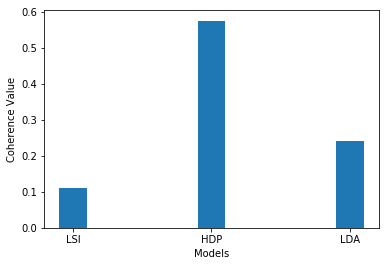

In [48]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])

## References:

- News classification with topic models in gensim https://markroxor.github.io/gensim/static/notebooks/gensim_news_classification.html#topic=0&lambda=1&term=
- Perplexity to evaluate topic models: http://qpleple.com/perplexity-to-evaluate-topic-models/
- Topic Coherence https://rare-technologies.com/what-is-topic-coherence/